In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [2]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.01 * t_u

In [3]:
def model(t_u, w1, w2, b):
    return w2 * t_u**2 + w1 * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

In [6]:
params.grad is None

True

In [7]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([3.6181e+05, 2.3149e+07, 5.9642e+03])

In [8]:
if params.grad is not None:
    params.grad.zero_()

In [9]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
            
        w1, w2, b = params
        
        t_p = model(t_u, w1, w2, b) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [10]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True), 
    t_u = t_un, 
    t_c = t_c)

params

Epoch 500, Loss 26.266182
Epoch 1000, Loss 12.949668
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289264
Epoch 4000, Loss 2.179901
Epoch 4500, Loss 2.130778
Epoch 5000, Loss 2.108713


tensor([ 24.3412,  27.9050, -10.3017], requires_grad=True)

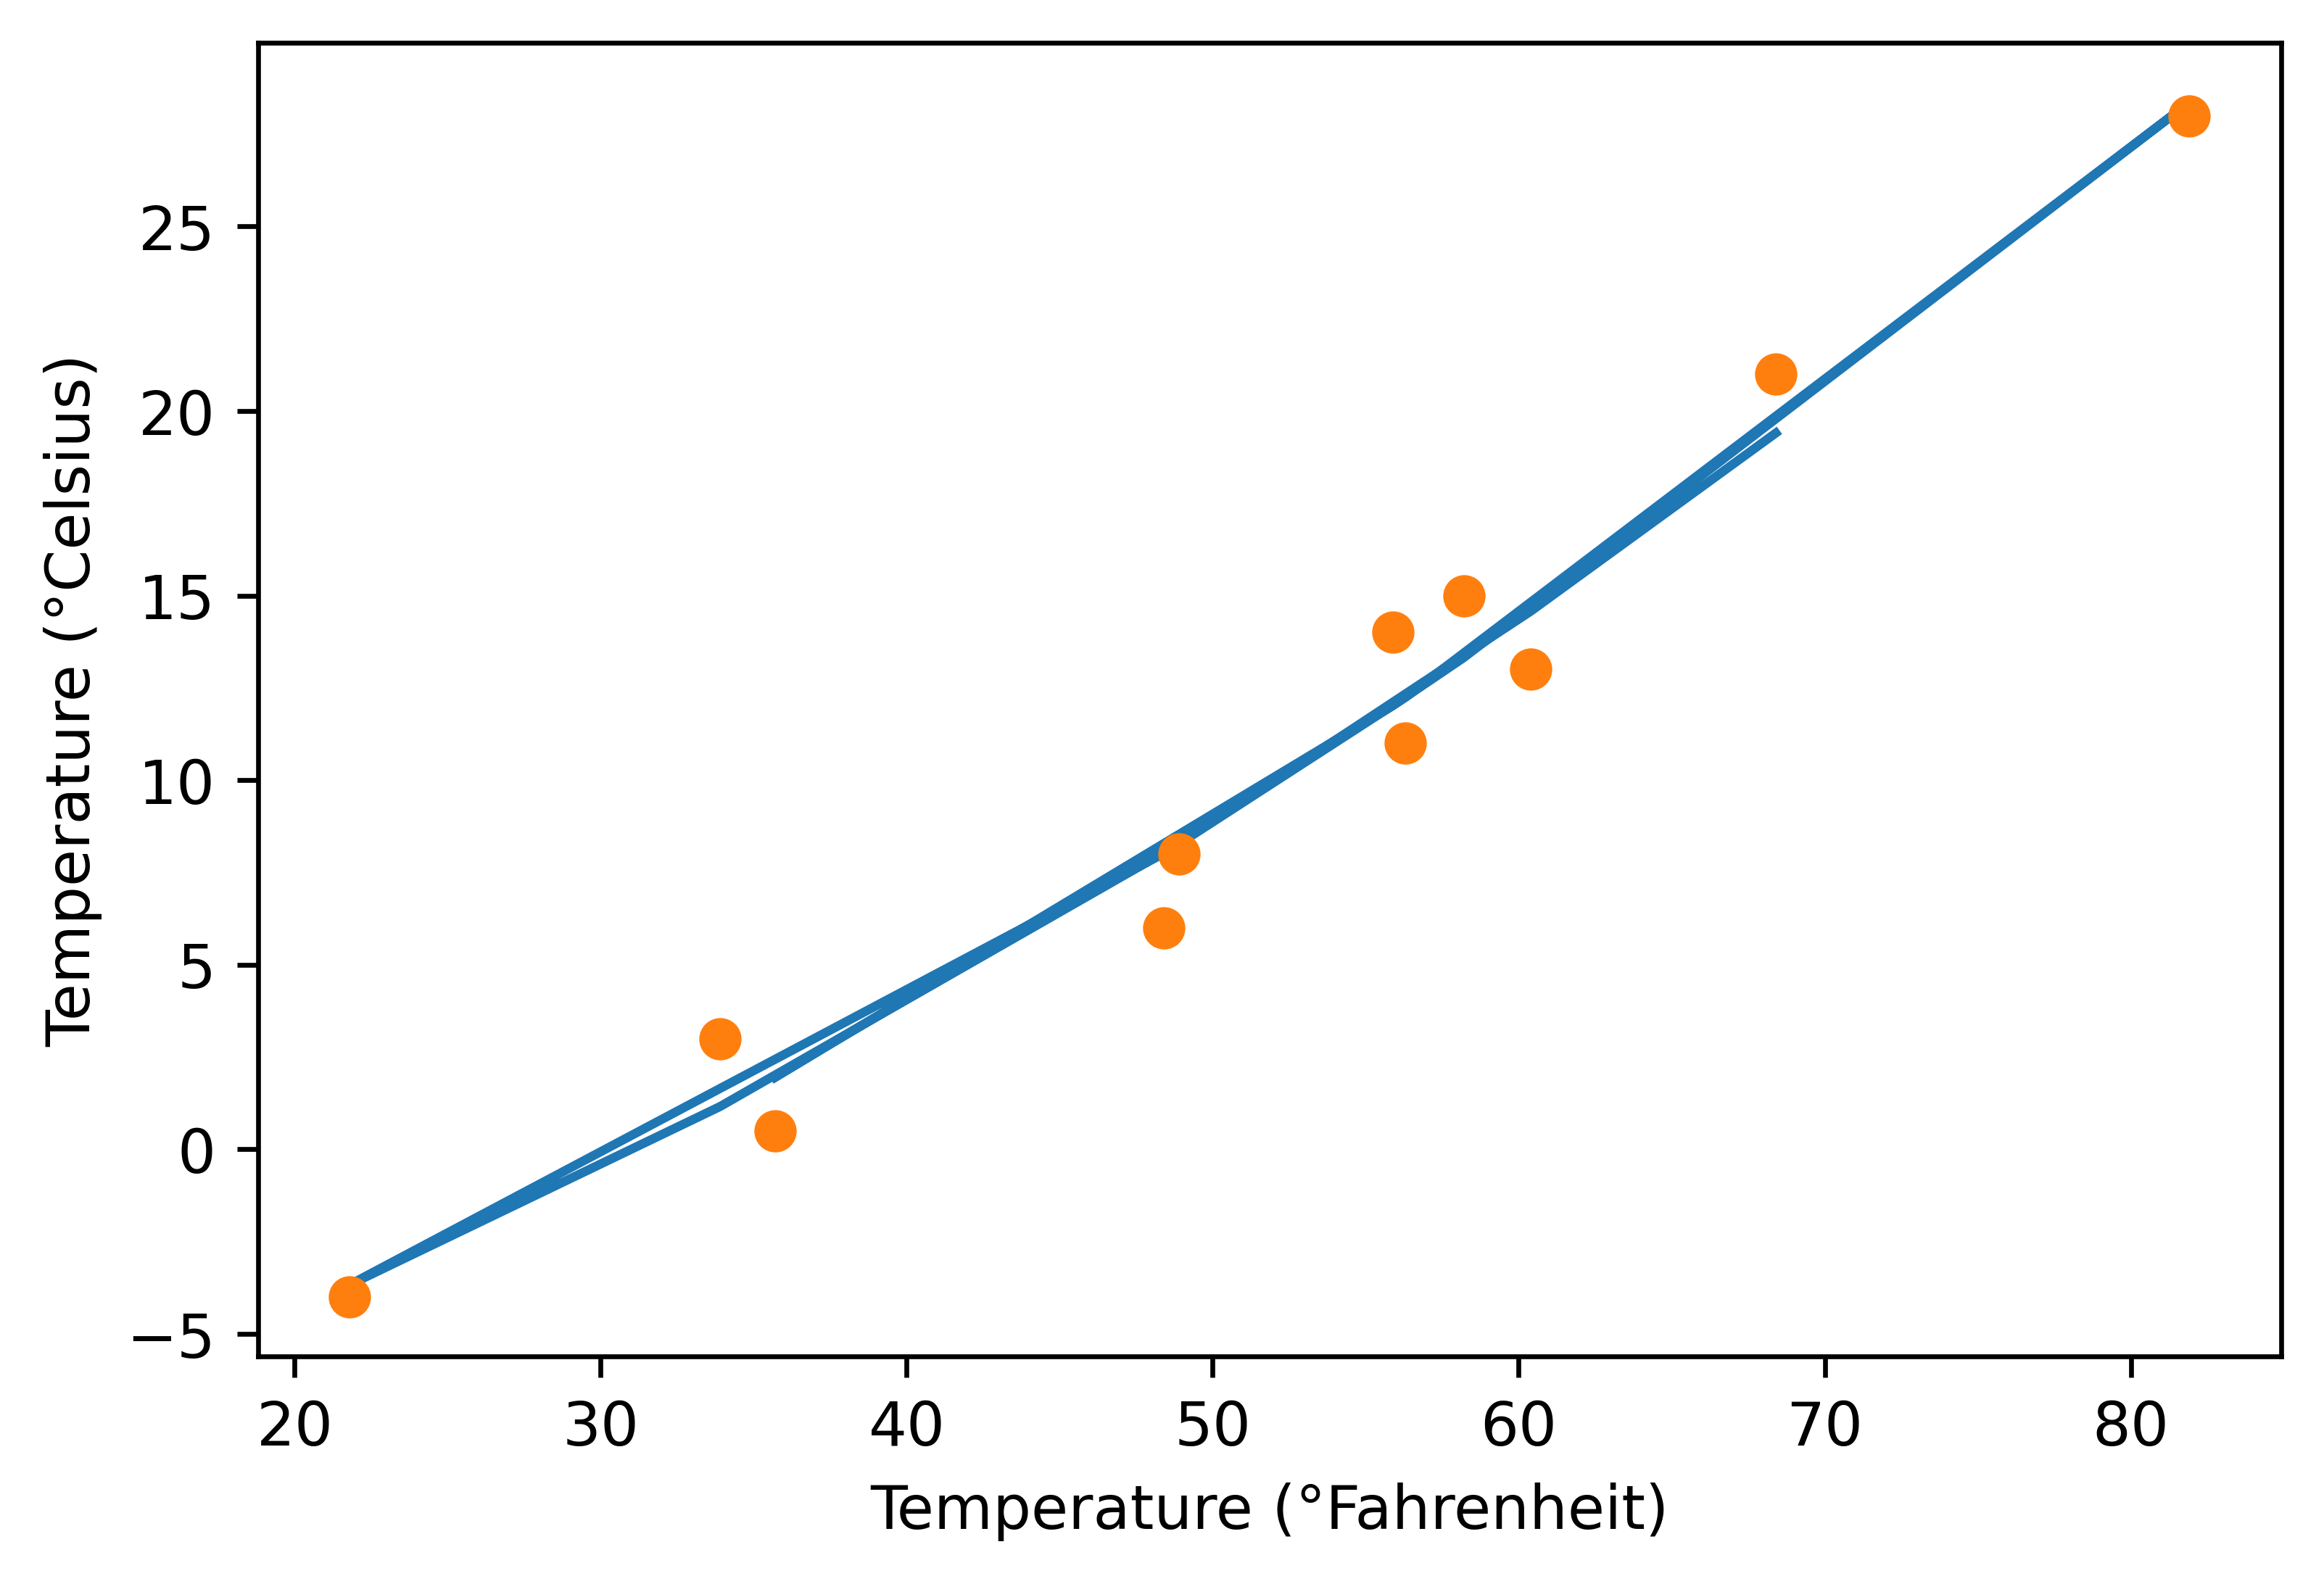

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip